<a href="https://colab.research.google.com/github/thw96/Sales-Forecasting-and-EDA-Challenge/blob/master/sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_excel('/content/drive/My Drive/Sales EDA/Sample - Superstore.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Data Pre-Processing

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Deciding on Attributews and if they need to be encoded(Categoricals)

In [5]:
df['Ship Mode'] = df['Ship Mode'].astype('category',copy=False)
df['Segment'] = df['Segment'].astype('category',copy=False)
df['Country'] = df['Country'].astype('category',copy=False)
df['City'] = df['City'].astype('category',copy=False)
df['State'] = df['State'].astype('category',copy=False)
df['Category'] = df['Category'].astype('category',copy=False)

Check the Correlations between the attributes

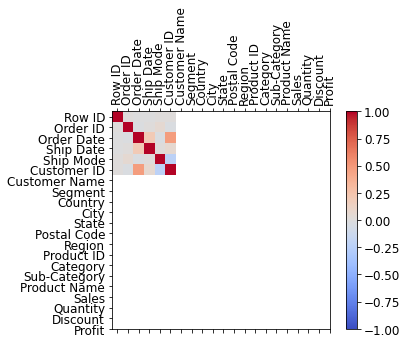

In [6]:
#used th Pearson correlation
corr=df.corr(method ='pearson') 
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()


In [7]:
df.apply(lambda x : pd.factorize(x)[0]).corr(method='kendall', min_periods=1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.999900,0.195241,0.223975,0.001180,0.144149,0.144149,0.013942,NaN,0.042812,-0.007158,0.063957,-0.008621,0.176294,-0.003660,0.001996,0.173210,0.506700,-0.009455,0.011510,0.672508
Order ID,0.999900,1.000000,0.195261,0.223998,0.001180,0.144163,0.144163,0.013943,NaN,0.042816,-0.007158,0.063964,-0.008621,0.176292,-0.003662,0.001998,0.173208,0.506671,-0.009457,0.011511,0.672460
Order Date,0.195241,0.195261,1.000000,0.275963,0.011055,0.104475,0.104475,-0.006282,NaN,0.024187,-0.005833,0.033291,-0.032680,0.088604,-0.000097,0.006504,0.089992,0.150410,-0.002904,-0.004523,0.161264
Ship Date,0.223975,0.223998,0.275963,1.000000,0.023713,0.093587,0.093587,0.016346,NaN,0.030102,-0.000182,0.036868,-0.022402,0.095041,-0.000964,-0.014787,0.094496,0.163485,-0.007520,-0.002151,0.185882
Ship Mode,0.001180,0.001180,0.011055,0.023713,1.000000,0.008804,0.008804,0.006605,NaN,0.000490,0.005196,-0.007914,0.012988,-0.008682,0.003507,0.003512,-0.006165,0.008995,-0.009982,0.030230,0.004827
Customer ID,0.144149,0.144163,0.104475,0.093587,0.008804,1.000000,1.000000,0.035550,NaN,0.030064,0.011510,0.039302,-0.003080,0.088192,-0.013904,-0.006392,0.087962,0.124477,-0.008643,0.002083,0.130629
Customer Name,0.144149,0.144163,0.104475,0.093587,0.008804,1.000000,1.000000,0.035550,NaN,0.030064,0.011510,0.039302,-0.003080,0.088192,-0.013904,-0.006392,0.087962,0.124477,-0.008643,0.002083,0.130629
Segment,0.013942,0.013943,-0.006282,0.016346,0.006605,0.035550,0.035550,1.000000,NaN,0.006581,0.019176,0.030817,0.003669,0.010189,0.008308,0.010524,0.011783,0.014444,0.018779,-0.015918,0.012517
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,0.042812,0.042816,0.024187,0.030102,0.000490,0.030064,0.030064,0.006581,NaN,1.000000,0.303228,0.694480,-0.053973,0.025207,-0.004986,0.003552,0.023175,0.041971,0.007192,-0.010740,0.046974


In [8]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [10]:
df = df.set_index('Order Date')
df.index

DatetimeIndex(['2017-11-08', '2017-11-08', '2017-06-12', '2016-10-11',
               '2016-10-11', '2015-06-09', '2015-06-09', '2015-06-09',
               '2015-06-09', '2015-06-09',
               ...
               '2016-05-17', '2016-05-17', '2017-09-29', '2018-11-17',
               '2018-11-17', '2015-01-21', '2018-02-26', '2018-02-26',
               '2018-02-26', '2018-05-04'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [12]:
y = df['Sales'].resample('MS').mean()
y

Order Date
2015-01-01    180.213861
2015-02-01     98.258522
2015-03-01    354.719803
2015-04-01    209.595148
2015-05-01    193.838418
2015-06-01    256.260204
2015-07-01    237.387364
2015-08-01    182.414827
2015-09-01    305.139369
2015-10-01    197.820082
2015-11-01    247.260115
2015-12-01    250.164103
2016-01-01    313.346131
2016-02-01    186.740797
2016-03-01    280.625014
2016-04-01    213.720053
2016-05-01    206.381414
2016-06-01    179.690522
2016-07-01    205.466607
2016-08-01    232.064982
2016-09-01    220.463884
2016-10-01    189.186286
2016-11-01    234.483221
2016-12-01    237.087092
2017-01-01    208.342596
2017-02-01    276.853193
2017-03-01    317.275307
2017-04-01    227.941406
2017-05-01    253.278791
2017-06-01    202.736352
2017-07-01    195.333149
2017-08-01    176.791899
2017-09-01    202.231474
2017-10-01    304.529311
2017-11-01    214.626935
2017-12-01    275.565463
2018-01-01    283.686284
2018-02-01    189.730219
2018-03-01    247.362827
2018-04-01    

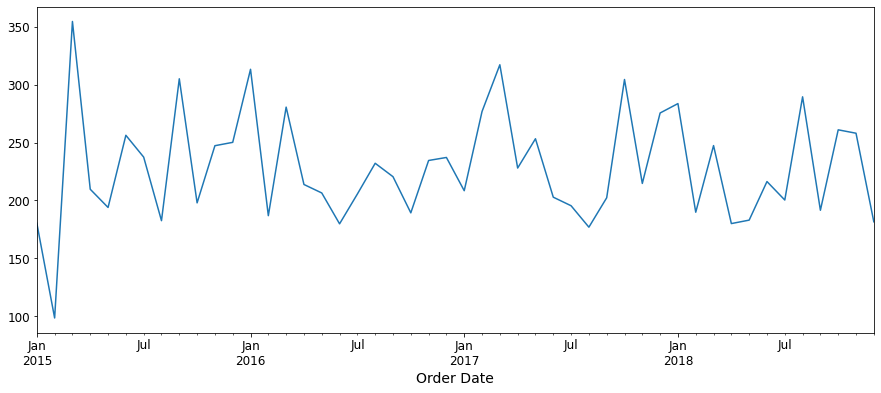

In [13]:
y.plot(figsize=(15, 6))
plt.show()

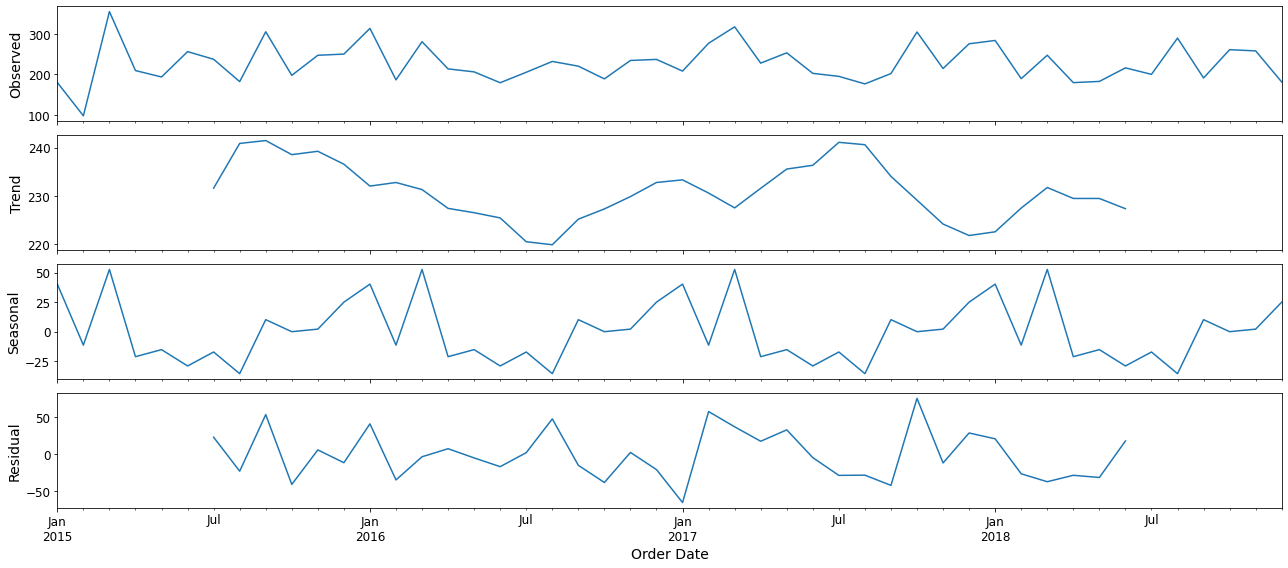

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0754      0.251     -0.300      0.764      -0.567       0.417
ma.L1         -1.0000   1657.233     -0.001      1.000   -3249.117    3247.117
ar.S.L12      -0.5256      0.180     -2.919      0.004      -0.878      -0.173
sigma2      2305.2200   3.82e+06      0.001      1.000   -7.49e+06    7.49e+06


In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        except:
              continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:648.1839075951442
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1513.4966245312862
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:387.2573300710416
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:402.9785621461098


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1420.2615065231296
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:262.1644595966525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:597.6546056979397
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:376.32516375801754


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:405.05392614313666
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:263.3626446818684


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:528.1869579690364
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1376.3196683612805
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:402.41176085765005
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:387.20858105018107
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1361.9667431647495
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:270.9438065103488
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:467.6414267046178
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2625.934928160101
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:370.0243667754501
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:368.61177626116375
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2306.793617657849
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:257.3728477272853
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:540.6772379709616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:993.7775947096638
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:389.2433793870417
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:387.31623902849424


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1210.7223212525166
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:253.07897093915838
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:496.905049049053
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2929.891894900628
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:374.4935542234051
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:371.88633494699866
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1101.411469393346
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:254.9997497656639
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:508.2261316167208
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1415.4653157909283
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:397.0218685707201
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:362.3077167536286


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1433.5132950817751
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:245.87074565604738
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:468.8192870346744
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3579.787754506362
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:372.0243404313506
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:357.38039336227087
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2620.263362656923
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:243.3445655322018


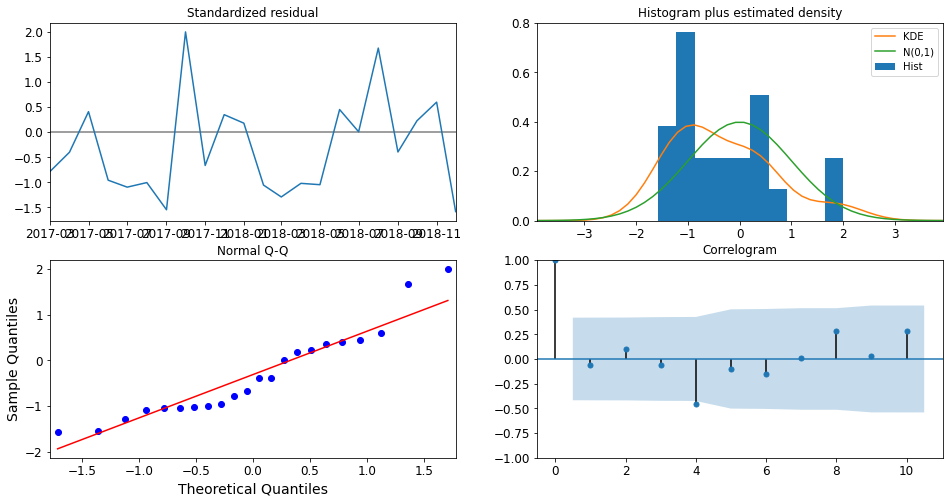

In [28]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

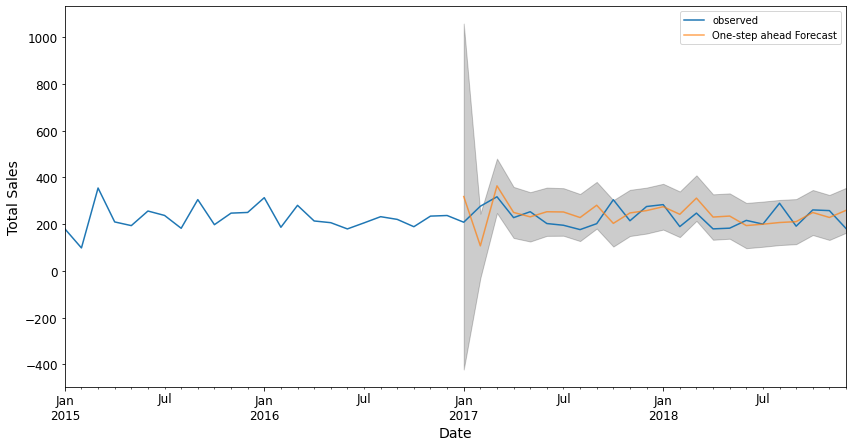

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4049.31


In [32]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 63.63


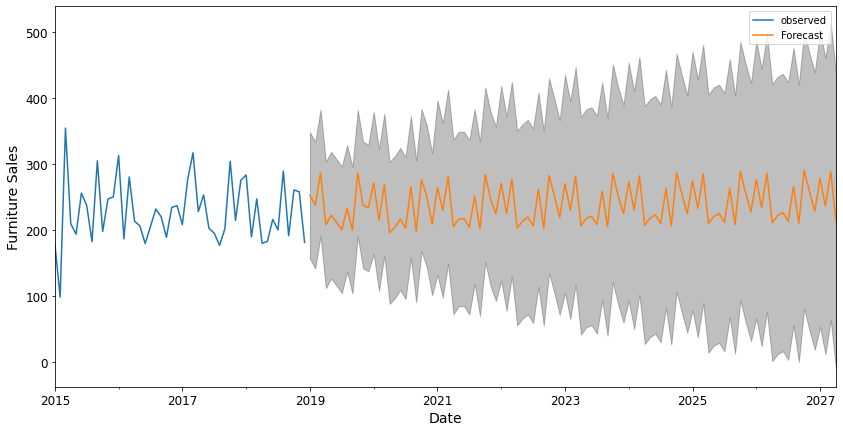

In [44]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

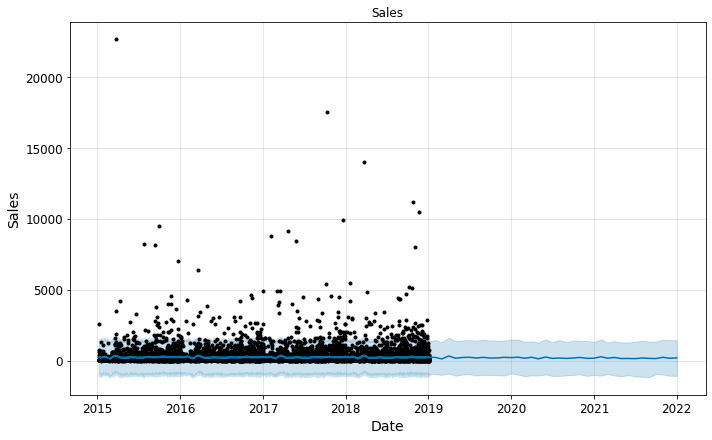

In [50]:
from fbprophet import Prophet
df = df.rename(columns={'Ship Date': 'ds', 'Sales': 'y'})
df.head()
sales_model = Prophet(interval_width=0.95)
sales_model.fit(df)

sales_forecast = sales_model.make_future_dataframe(periods=36, freq='MS')
sales_forecast = sales_model.predict(sales_forecast)

plt.figure(figsize=(18, 6))
sales_model.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Sales');